In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('BSE.csv',index_col="Date",parse_dates=True)


In [3]:
dataset.head()


,Open,High,Low,Close,Volume
Date,,,,,
2015-03-06,27230.67969,27276.22070,26698.25977,26837.19922,14000
2015-04-06,26940.64063,26948.83984,26551.97070,26813.41992,11600
2015-05-06,26819.82031,27014.41992,26718.43945,26768.49023,11900
2015-08-06,26814.31055,26827.06055,26472.86914,26523.08984,7900
2015-09-06,26510.28906,26604.65039,26438.32031,26481.25000,11000


In [4]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1229 entries, 2015-03-06 to 2020-02-06
Data columns (total 5 columns):
Open      1229 non-null float64
High      1229 non-null float64
Low       1229 non-null float64
Close     1229 non-null float64
Volume    1229 non-null int64
dtypes: float64(4), int64(1)
memory usage: 57.6 KB


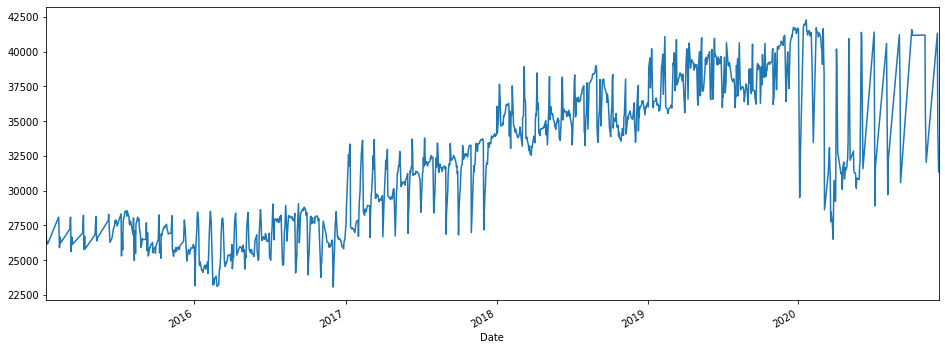

In [6]:
dataset['Open'].plot(figsize=(16,6))

In [7]:
dataset["Volume"] = dataset["Volume"].astype(float)

In [8]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2015-03-06,NaN,NaN,NaN,NaN,NaN
2015-04-06,NaN,NaN,NaN,NaN,NaN
2015-05-06,NaN,NaN,NaN,NaN,NaN
2015-08-06,NaN,NaN,NaN,NaN,NaN
2015-09-06,NaN,NaN,NaN,NaN,NaN
2015-10-06,NaN,NaN,NaN,NaN,NaN
2015-11-06,26827.577289,26943.724609,26531.725446,26662.132811,10871.428571
2015-12-06,26700.383091,26831.347377,26475.841237,26603.290177,10242.857143
2015-06-15,26637.244419,26799.884487,26440.965400,26570.880300,10157.142857


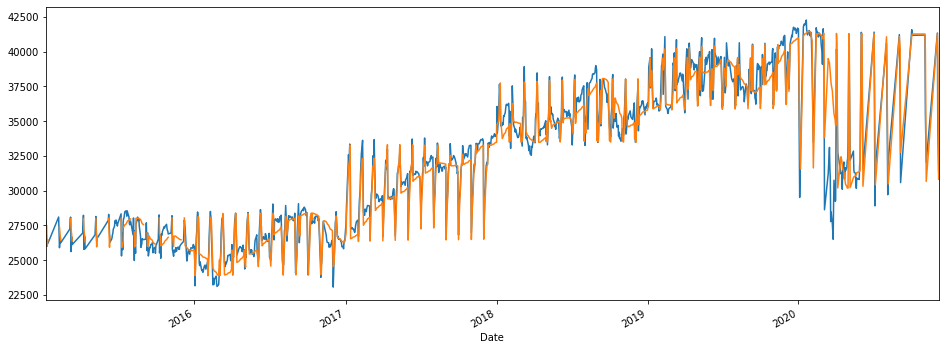

In [9]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

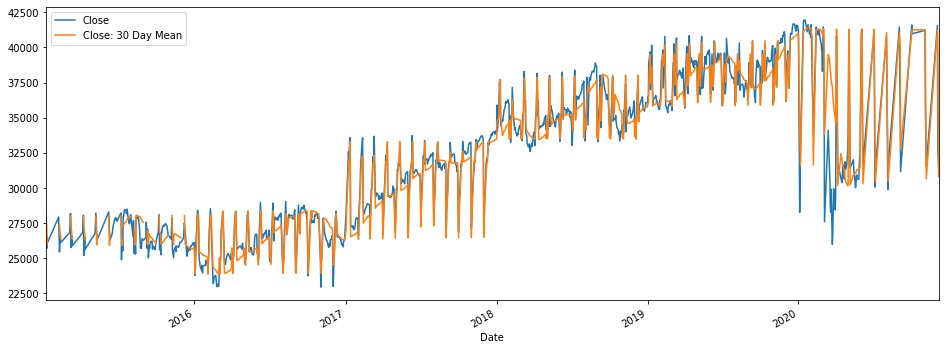

In [10]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

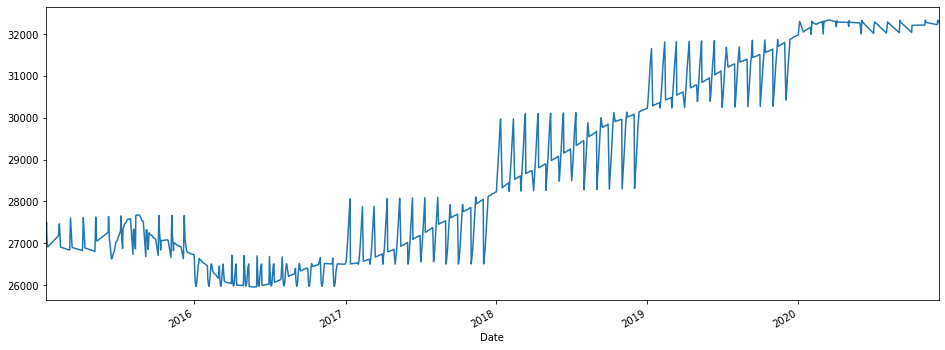

In [11]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [12]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [13]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [14]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1229):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



Using TensorFlow backend.


In [16]:
# Initialising the RNN
regressor = Sequential()



In [17]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [18]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
1169/1169 [==============================] - 14s 12ms/step - loss: 0.0439
Epoch 2/100
1169/1169 [==============================] - 10s 8ms/step - loss: 0.0098
Epoch 3/100
1169/1169 [==============================] - 10s 8ms/step - loss: 0.0084
Epoch 4/100
1169/1169 [==============================] - 10s 8ms/step - loss: 0.0080
Epoch 5/100
1169/1169 [==============================] - 9s 8ms/step - loss: 0.0073
Epoch 6/100
1169/1169 [==============================] - 9s 8ms/step - loss: 0.0071
Epoch 7/100
1169/1169 [==============================] - 8s 7ms/step - loss: 0.0070
Epoch 8/100
1169/1169 [==============================] - 10s 9ms/step - loss: 0.0074
Epoch 9/100
1169/1169 [==============================] - 11s 9ms/step - loss: 0.0058
Epoch 10/100
1169/1169 [==============================] - 11s 9ms/step - loss: 0.0060
Epoch 11/100
1169/1169 [==============================] - 11s 9ms/step - loss: 0.0050
Epoch 12/100
1169/1169 [==============================] - 11s 9m

1169/1169 [==============================] - 10s 9ms/step - loss: 0.0018
Epoch 94/100
1169/1169 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 95/100
1169/1169 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 96/100
1169/1169 [==============================] - 11s 9ms/step - loss: 0.0017
Epoch 97/100
1169/1169 [==============================] - 14s 12ms/step - loss: 0.0016
Epoch 98/100
1169/1169 [==============================] - 15s 13ms/step - loss: 0.0016
Epoch 99/100
1169/1169 [==============================] - 15s 13ms/step - loss: 0.0019
Epoch 100/100
1169/1169 [==============================] - 12s 10ms/step - loss: 0.0016


In [19]:
# Part 3 - Making the predictions and visualising the results
dataset_test = pd.read_csv('BSE_Test.csv',index_col="Date",parse_dates=True)

In [20]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2020-03-06 to 2020-08-06
Data columns (total 5 columns):
Open      4 non-null float64
High      4 non-null float64
Low       4 non-null float64
Close     4 non-null float64
Volume    4 non-null int64
dtypes: float64(4), int64(1)
memory usage: 192.0 bytes


In [22]:
dataset_test["Volume"] = dataset_test["Volume"].astype(float)

In [23]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [24]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2020-03-06 to 2020-08-06
Data columns (total 1 columns):
Open    4 non-null float64
dtypes: float64(1)
memory usage: 64.0 bytes


In [26]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 64):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [27]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
0    4 non-null float32
dtypes: float32(1)
memory usage: 96.0 bytes


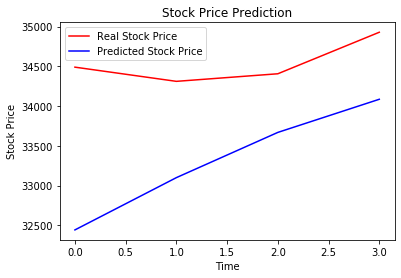

In [29]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()